<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos_machine_learning/blob/main/Testes_de_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testes de Hipóteses

* Resposta sim ou não, para confirmar ou rejeitar uma afirmação.
* Hipótese: ideia a ser testada
* Hipótese nula (H0)
  * Afirmação que já existia
  * Presumir que é verdadeira até que se prove o contrário
* Hipótese alternativa (H1)
  * O que está tentando provar (tudo o que é diferente da nula)
* Alpha
  * Probabilidade de rejeitar a hipótese nula, quanto menor mais seguro é o resultado (nível de significância) - em geral 0,01 ou 0,05.
  * 5% de chances de concluir que existe uma diferença quando não há diferença real
* Valor de p (p-value)
  * p-value >= alpha: não rejeita H0 (não temos evidências)
  * p-value < alpha: rejeita H0 (temos evidência)
* Erro Tipo I: rejeitar a hipótese nula quando não deveria
* Erro Tipo II: não rejeitar nua quando deveria ter rejeitado

## Bibliotecas






In [1]:
import numpy as np
import math
from scipy.stats import norm

## Base de dados

In [2]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                             150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                             154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                             157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                             161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                             164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                             168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                             171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. , 192.5])

In [3]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [4]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

In [5]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [6]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [7]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [8]:
H1_n = len(dados_novos)
H1_n

100

In [9]:
alpha = 0.05

## Teste de hípotese Z

### teste manual

In [10]:
Z = (H1_media - H0_media) / (H1_desvio_padrao / math.sqrt(H1_n))
Z

3.398058252427187

In [11]:
norm.cdf(Z), norm.ppf(0.9996606701617486)

(0.9996606701617486, 3.3980582524271936)

In [12]:
Z = norm.cdf(Z)
Z

0.9996606701617486

In [13]:
p = 1 - Z
p

0.00033932983825135654

In [14]:
if p < alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


### teste com statsmodels

In [15]:
from statsmodels.stats.weightstats import ztest

In [16]:
_, p = ztest(dados_originais, dados_novos,
             value = H1_media - H0_media,
             alternative='larger')

In [17]:
p

0.9999993877283934

## Teste de Hípotese T

In [18]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [19]:
dados_originais.mean(), np.std(dados_originais)

(161.77777777777777, 12.786953227391823)

In [20]:
dados_novos = dados_originais * 1.02
dados_novos

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [21]:
dados_novos.mean(), np.std(dados_novos)

(165.01333333333332, 13.042692291939664)

In [22]:
from scipy.stats import ttest_rel

In [23]:
_, p = ttest_rel(dados_originais, dados_novos)
p

4.072922493930298e-10

In [24]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


## Teste qui quadrado

In [25]:
from scipy.stats import chi2_contingency

In [26]:
#tabela = np.array([[30, 20], [22, 28]])
tabela = np.array([[45,5], [5, 45]])

In [27]:
tabela.shape

(2, 2)

In [28]:
_, p, _, _ = chi2_contingency(tabela)
p

6.190717543917382e-15

In [29]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


# Seleção de atributos com testes de hipóteses - univariate SelectFdr

Testes estatísticos univariados são aqueles que envolvem uma variável dependente, por exemplo, teste t ou teste z para comparação de médias

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [32]:
dataset = pd.read_csv('/content/drive/MyDrive/Estatística para Ciência de Dados e Machine Learning/Bases de dados/ad.data', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [33]:
dataset.shape

(3279, 1559)

In [34]:
X = dataset.iloc[:, 0:1558].values
X

array([[125.    , 125.    ,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [35]:
y = dataset.iloc[:,1558].values
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

In [36]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820]))

In [37]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

0.7813357731015553

In [38]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)

In [39]:
X.shape, X_novo.shape

((3279, 1558), (3279, 433))

In [40]:
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]), 1558)

In [41]:
np.sum(selecao.pvalues_ <= 0.01)

476

In [42]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [43]:
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [44]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(y, previsoes2)

0.970722781335773

### Seleção de atributos com ANOVA


In [66]:
from sklearn.feature_selection import f_classif

In [67]:
selecao = SelectFdr(f_classif, alpha=0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [68]:
X.shape, X_novo.shape, X_novo_2.shape

((3279, 1558), (3279, 433), (3279, 433))

In [69]:
selecao.pvalues_

array([1.31095977e-005, 1.19510994e-200, 4.91337302e-016, ...,
       1.35872010e-042, 3.77636040e-012, 9.35989125e-002])

In [71]:
np.sum(selecao.pvalues_ < 0.01)

476

In [72]:
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)
previsoes3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes3)

0.970722781335773

## ANOVA - Análise de Variação

* Comparação entre 3 ou mais grupos (amostras independentes)
* Uma variável quantitativa e uma ou mais variáveis qualitativas
* Distribuição normal (estatística paramétrica)
* Variação entre os grupos comparando a variação dentro dos grupos
* H0: não há diferença estatística
* H1: existe diferença estatística


In [45]:
grupo_a = np.array([165,152,143,140,155])
grupo_b = np.array([130,169,164,143,154])
grupo_c = np.array([163,158,154,149,156])

In [46]:
from scipy.stats import f

In [48]:
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

3.8852938346523933

In [49]:
from scipy.stats import f_oneway

In [50]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [51]:
alpha = 0.05
if p<= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')


Hipótese alternativa rejeitada


### Teste de Tukey

In [52]:
dados = {'valores':[165,152,143,140,155,130,169,164,143,154,163,158,154,149,156],
         'grupo':['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C',]}

In [60]:
dados = {'valores':[70,90,80,50,20,130,169,164,143,154,163,158,154,149,156],
         'grupo':['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C',]}

In [61]:
import pandas as pd
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [62]:
from statsmodels.stats.multicomp import MultiComparison

In [63]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [64]:
teste = compara_grupos.tukeyhsd()
print(teste)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B     90.0    0.0  58.4785 121.5215   True
     A      C     94.0    0.0  62.4785 125.5215   True
     B      C      4.0 0.9391 -27.5215  35.5215  False
------------------------------------------------------


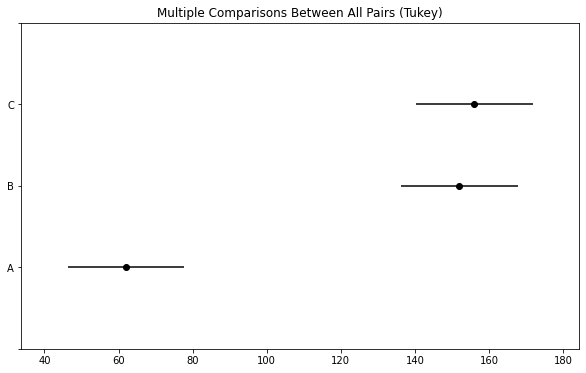

In [65]:
teste.plot_simultaneous();

### Resultados dos algoritmos de machine learning

In [73]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('/content/drive/MyDrive/Estatística para Ciência de Dados e Machine Learning/Bases de dados/credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [75]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [76]:
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [79]:
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [80]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv=kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv=kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv=kfold)
  resultados_forest_cv.append(scores.mean())  

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [81]:
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249859296482411, 0.9457008375209381, 0.9868467336683417)

### Teste de hipótese de Shapiro-Wilk

In [82]:
alpha = 0.05

In [83]:
from scipy.stats import shapiro
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

(ShapiroResult(statistic=0.9646664261817932, pvalue=0.40516602993011475),
 ShapiroResult(statistic=0.9463125467300415, pvalue=0.13457602262496948),
 ShapiroResult(statistic=0.9767547249794006, pvalue=0.7342835664749146))

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


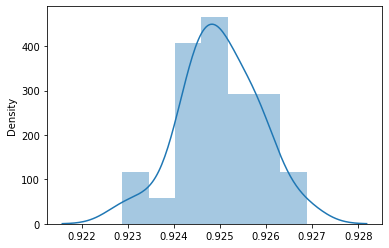

In [84]:
import seaborn as sns
sns.distplot(resultados_naive_cv);


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


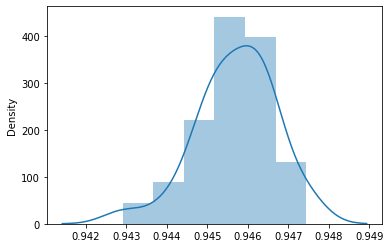

In [85]:
sns.distplot(resultados_logistica_cv);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


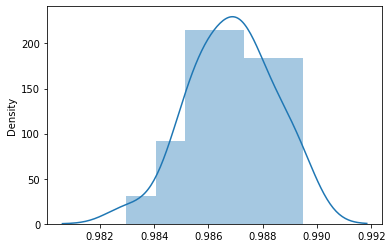

In [86]:
sns.distplot(resultados_forest_cv);

### teste de hípotese de D'Agostinho K^2

In [87]:
from scipy.stats import normaltest
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=0.48250748201886046, pvalue=0.7856422514366839))

### Teste de Hipótese de Anderson-Darling

In [90]:
from scipy.stats import anderson
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

(0.5456346672421084, 0.6048933015735933, 0.2279163087865541)